In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [7]:
df = pd.read_csv("results/results_2_to_1_new_emip.csv")
one_to_one_df = pd.read_csv("results/results_1_to_1_new_emip.csv")
df.columns

Index(['Unnamed: 0', 'rmse', 'oos_rmse', 'FGI', 'in_study_prediction',
       'in_study_labels', 'oos_prediction', 'oos_labels',
       'dimensionality_reduction', 'out_of_study', 'in_study',
       'feature_combinations'],
      dtype='object')

In [8]:
feature_group_regexes = {
    "eye_tracking": [
        "information_processing_ratio",
        "saccade_speed_skewness",
        "entropy_xy",
        "saccade_verticality",
    ],
    "heatmaps":[
        "heatmaps_*",
    ],
    "fft":[
        "pupil_diameter_rolling__fft_aggregated_*",
        "^duration_rolling__fft_aggregated__*",
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_duration_rolling__fft_aggregated__*",
    ],
    "lhipa": [
        "pupil_diameter_rolling__lhipa",
        "saccade_length_rolling__lhipa",
        "saccade_duration_rolling__lhipa",
        "^duration_rolling__lhipa",
    ],
    "markov":[
        "^duration_rolling__markov",
        "pupil_diameter_rolling__markov",
        "saccade_duration_rolling__markov",
        "saccade_length_rolling__markov",
    ],
    "Arma": [
        "pupil_diameter_rolling__arma__*",
        "^duration_rolling__arma__*",
        "saccade_length_rolling__arma__*",
        "saccade_duration_rolling__arma__*",
    ],
    "garch":[
        "saccade_duration_rolling__garch",
        "^duration_rolling__garch",
        "pupil_diameter_rolling__garch",
        "saccade_length_rolling__garch",
    ],
    "pupil_diameter":[
        "pupil_diameter_rolling__fft_aggregated_*",
        "pupil_diameter_rolling__lhipa",
        "pupil_diameter_rolling__markov",
        "pupil_diameter_rolling__arma__*",
        "pupil_diameter_rolling__garch",
    ],
    "fixation_duration":[
        "^duration_rolling__fft_aggregated__*",
        "^duration_rolling__lhipa",
        "^duration_rolling__markov",
        "^duration_rolling__arma__*",
        "^duration_rolling__garch",
    ],
    "saccade_length":[
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_length_rolling__lhipa",
        "saccade_length_rolling__markov",
        "saccade_length_rolling__arma__*",
        "saccade_length_rolling__garch",
    ],
    "saccade_duration":[
        "saccade_duration_rolling__fft_aggregated__*",
        "saccade_duration_rolling__lhipa",
        "saccade_duration_rolling__markov",
        "saccade_duration_rolling__arma__*",
        "saccade_duration_rolling__garch",
    ],
    "all":[
        "information_processing_ratio",
        "saccade_speed_skewness",
        "entropy_xy",
        "saccade_verticality",
        "heatmaps_*",
        "pupil_diameter_rolling__fft_aggregated_*",
        "pupil_diameter_rolling__lhipa",
        "pupil_diameter_rolling__markov",
        "pupil_diameter_rolling__arma__*",
        "pupil_diameter_rolling__garch",
        "^duration_rolling__fft_aggregated__*",
        "^duration_rolling__lhipa",
        "^duration_rolling__markov",
        "^duration_rolling__arma__*",
        "^duration_rolling__garch",
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_length_rolling__lhipa",
        "saccade_length_rolling__markov",
        "saccade_length_rolling__arma__*",
        "saccade_length_rolling__garch",
        "saccade_duration_rolling__fft_aggregated__*",
        "saccade_duration_rolling__lhipa",
        "saccade_duration_rolling__markov",
        "saccade_duration_rolling__arma__*",
        "saccade_duration_rolling__garch",
    ],
}

baselines = {
 "cscw": 0.2054194369131811,
 "emip": 0.31011607853729956,
 "fractions": 0.22897823445668405,
 "emip_fractions": 0.2943192380673428,
 "fractions_cscw": 0.23408157826890597,
 "emip_cscw": 0.28871689591649174
}
random_baselines = {
 'cscw': 0.35408194888273653,
 'emip': 0.4241358322246148,
 'fractions': 0.39295164906188074,
 'emip_fractions': 0.4170846635199361,
 'fractions_cscw': 0.37619048780763514,
 'emip_cscw': 0.40841293420269603
}


name_mapping = {
 "['cscw']": "cscw",
 "['emip']": "emip",
 "['fractions']": "fractions",
 "['emip', 'fractions']": "emip_fractions",
 "['fractions', 'cscw']": "fractions_cscw",
 "['emip', 'cscw']": "emip_cscw"
}

inv_map = {str(v): k for k, v in feature_group_regexes.items()}
df["feature_combinations"] = df["feature_combinations"].map(inv_map)
df["in_study"] = df["in_study"].map(name_mapping)
df["baseline"] = df.loc[:, "in_study"].map(baselines)
df["oos_baseline"] = df.loc[:, "out_of_study"].map(baselines)
df["random_baseline"] = df.loc[:, "in_study"].map(random_baselines)
df["oos_random_baseline"] = 0.281476819416418 #df.loc[:, "out_of_study"].map(random_baselines)

one_to_one_df["feature_combinations"] = one_to_one_df["feature_combinations"].map(inv_map)
one_to_one_df["in_study"] = one_to_one_df["in_study"].map(name_mapping)
one_to_one_df["baseline"] = one_to_one_df.loc[:, "in_study"].map(baselines)
one_to_one_df["oos_baseline"] = one_to_one_df.loc[:, "out_of_study"].map(baselines)
one_to_one_df["random_baseline"] = one_to_one_df.loc[:, "in_study"].map(random_baselines)
one_to_one_df["oos_random_baseline"] = 0.281476819416418 #one_to_one_df.loc[:, "out_of_study"].map(random_baselines)
one_to_one_df

,Unnamed: 0,rmse,oos_rmse,FGI,in_study_prediction,in_study_labels,oos_prediction,oos_labels,dimensionality_reduction,out_of_study,in_study,feature_combinations,baseline,oos_baseline,random_baseline,oos_random_baseline
0,0,0.221880,0.272595,0.012832,"[0.5007284550000001, 0.5662064678000001, 0.451...","{'14': 0.5, '23': 0.25, '13': 0.25, '21': 0.12...","[0.3318045713, 0.4613438932, 0.404653819100000...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",lasso,cscw,fractions,eye_tracking,0.228978,0.205419,0.392952,0.281477
1,1,0.220833,0.315428,0.012599,"[0.574592471, 0.17240713, 0.20787222760000001,...","{'24': 0.375, '76': 0.125, '3': 0.125, '65': 0...","[0.21119352200000002, 0.43971726050000004, 0.2...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",PCA,cscw,fractions,eye_tracking,0.228978,0.205419,0.392952,0.281477
2,2,0.237729,0.366750,0.012493,"[0.2489698796, 0.30891082000000003, 0.28890937...","{'32': 0.25, '31': 0.125, '51': 0.75, '33': 0....","[0.1912813978, 0.23373266, 0.2494998699, 0.224...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",lasso,cscw,fractions,heatmaps,0.228978,0.205419,0.392952,0.281477
3,3,0.195510,0.332233,0.012416,"[0.3445898572, 0.46679205, 0.43078892430000004...","{'24': 0.375, '8': 0.375, '37': 0.125, '31': 0...","[0.2900506278, 0.3052406869, 0.3061982734, 0.2...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",PCA,cscw,fractions,heatmaps,0.228978,0.205419,0.392952,0.281477
4,4,0.278310,0.290118,0.013005,"[0.259582983, 0.2955110354, 0.3532633023, 0.29...","{'8': 0.375, '35': 0.0, '63': 0.25, '14': 0.5,...","[0.3083956458, 0.34374795690000004, 0.31685277...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",lasso,cscw,fractions,fft,0.228978,0.205419,0.392952,0.281477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,0.331674,0.257175,0.010816,"[0.5529838434000001, 0.49330497900000003, 0.36...","{'162': 0.5, '57': 0.5, '117': 1.0, '35': 0.5,...","[0.3870648021, 0.4461360133, 0.3900299021, 0.3...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",PCA,cscw,emip,saccade_length,0.310116,0.205419,0.424136,0.281477
140,140,0.350172,0.289161,0.010138,"[0.5286070601, 0.4669222564, 0.43914628, 0.505...","{'134': 0.0, '122': 0.5, '61': 1.0, '21': 0.5,...","[0.3410919059, 0.43579245380000003, 0.40254393...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",lasso,cscw,emip,saccade_duration,0.310116,0.205419,0.424136,0.281477
141,141,0.362518,0.220664,0.011052,"[0.28148683280000003, 0.6508805274, 0.41281511...","{'124': 1.0, '94': 0.0, '197': 0.0, '174': 0.5...","[0.4704607236, 0.1720358744, 0.6195546061, 0.4...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",PCA,cscw,emip,saccade_duration,0.310116,0.205419,0.424136,0.281477
142,142,0.310419,0.239943,0.010353,"[0.4738846386, 0.4101254627, 0.5130150622, 0.4...","{'179': 0.5, '111': 0.5, '15': 0.0, '31': 0.5,...","[0.3864648409, 0.3920124465, 0.4502240168, 0.3...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",lasso,cscw,emip,all,0.310116,0.205419,0.424136,0.281477


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Arma'),
  Text(1, 0, 'all'),
  Text(2, 0, 'eye_tracking'),
  Text(3, 0, 'fft'),
  Text(4, 0, 'fixation_duration'),
  Text(5, 0, 'garch'),
  Text(6, 0, 'heatmaps'),
  Text(7, 0, 'lhipa'),
  Text(8, 0, 'markov'),
  Text(9, 0, 'pupil_diameter'),
  Text(10, 0, 'saccade_duration'),
  Text(11, 0, 'saccade_length')])

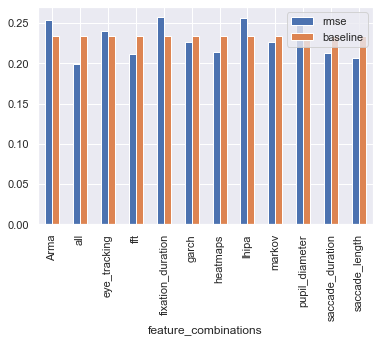

In [4]:
#MINIMUM RMSE PER FEATURE
minimum_rmse = df.loc[df.groupby('feature_combinations')["rmse"].idxmin()]
minimum_rmse.plot.bar(x="feature_combinations", y=["rmse", "baseline"])
plt.xticks(rotation=90)

IndexError: index 0 is out of bounds for axis 0 with size 0

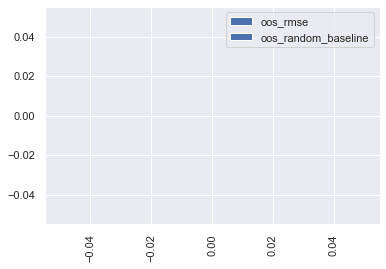

In [6]:
#MINIMUM OOS_RMSE PER FEATURE
minimum_rmse = df.loc[df.groupby('feature_combinations')["oos_rmse"].idxmin()]
minimum_rmse.plot.bar(x="feature_combinations", y=["oos_rmse", "oos_random_baseline"])
plt.xticks(rotation=90)
minimum_rmse

IndexError: index 0 is out of bounds for axis 0 with size 0

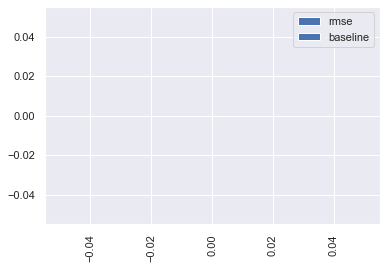

In [7]:
#MINIMUM RMSE PER DATASET
minimum_rmse = df.loc[df.groupby('in_study')["rmse"].idxmin()]
minimum_rmse.plot.bar(x="in_study", y=["rmse", "baseline"])

<AxesSubplot:xlabel='out_of_study'>

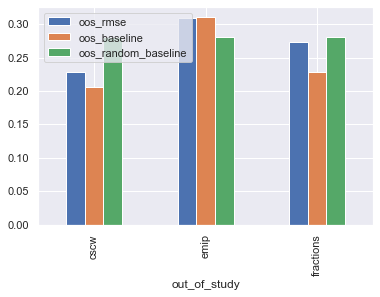

In [412]:
# OOS best pipeline vs baseline
minimum_rmse = df.loc[df.groupby('out_of_study')["oos_rmse"].idxmin()]
minimum_rmse.plot.bar(x="out_of_study", y=["oos_rmse", "oos_baseline", "oos_random_baseline"])

<AxesSubplot:xlabel='in_study'>

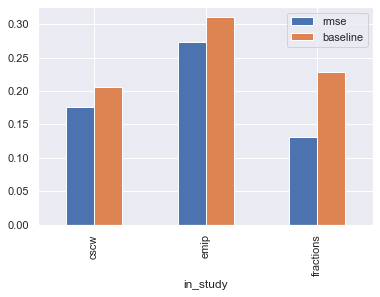

In [324]:
#MINIMUM RMSE PER oos DATASET
minimum_rmse = one_to_one_df.loc[one_to_one_df.groupby('in_study')["rmse"].idxmin()]
minimum_rmse.plot.bar(x="in_study", y=["rmse", "baseline"])

<AxesSubplot:xlabel='out_of_study'>

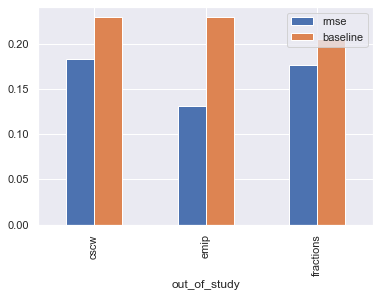

In [325]:
minimum_rmse = one_to_one_df.loc[one_to_one_df.groupby('out_of_study')["rmse"].idxmin()]
minimum_rmse.plot.bar(x="out_of_study", y=["rmse", "baseline"])

/Users/august/Library/Caches/pypoetry/virtualenvs/ideal-pancake-DNon77ew-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


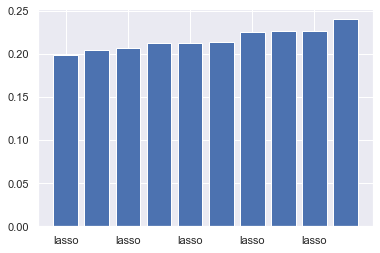

In [326]:
# MEAN RMSE PER oos DATASET
smallest = df.nsmallest(10, "rmse")
fig, ax = plt.subplots()
ax.bar(range(len(smallest.index)), smallest.loc[:, "rmse"])
ax.set_xticklabels(smallest.loc[:, "dimensionality_reduction"])
plt.show()

[Text(0, 0, 'PCA'),
 Text(1, 0, 'lasso'),
 Text(2, 0, 'lasso'),
 Text(3, 0, 'lasso'),
 Text(4, 0, 'lasso'),
 Text(5, 0, 'lasso'),
 Text(6, 0, 'PCA'),
 Text(7, 0, 'lasso'),
 Text(8, 0, 'lasso'),
 Text(9, 0, 'lasso'),
 Text(10, 0, 'PCA'),
 Text(11, 0, 'PCA'),
 Text(12, 0, 'PCA'),
 Text(13, 0, 'PCA'),
 Text(14, 0, 'PCA'),
 Text(15, 0, 'lasso'),
 Text(16, 0, 'lasso'),
 Text(17, 0, 'PCA'),
 Text(18, 0, 'lasso'),
 Text(19, 0, 'lasso')]

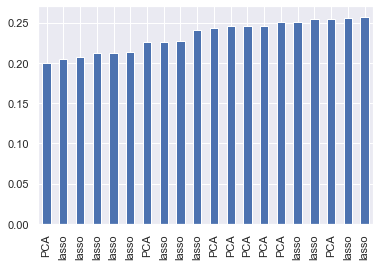

In [327]:
# TOP 13 RMSE with dimensionality reduction
smallest = df.nsmallest(20, "rmse")
ax = smallest.loc[:,"rmse"].plot(kind="bar", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["dimensionality_reduction"], rotation=90)

In [328]:
# TOP 13 RMSE with features
smallest = df.loc["out_of_study"].nsmallest(13, "oos_rmse")
ax = smallest.loc[].plot(kind="bar", y use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["feature_combinations"], rotation=90)

SyntaxError: invalid syntax (<ipython-input-328-bfe63e77d5a5>, line 3)

[Text(0, 0, 'garch'),
 Text(1, 0, 'pupil_diameter'),
 Text(2, 0, 'saccade_length'),
 Text(3, 0, 'saccade_duration'),
 Text(4, 0, 'Arma'),
 Text(5, 0, 'pupil_diameter'),
 Text(6, 0, 'markov'),
 Text(7, 0, 'saccade_duration'),
 Text(8, 0, 'fft'),
 Text(9, 0, 'Arma'),
 Text(10, 0, 'all'),
 Text(11, 0, 'fixation_duration'),
 Text(12, 0, 'lhipa')]

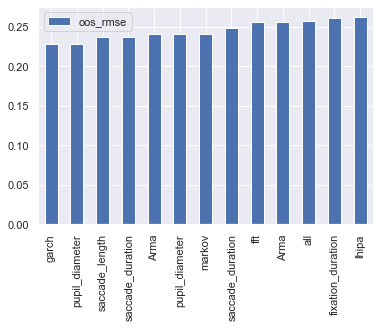

In [329]:
# TOP 13 OOS_RMSE with features
smallest = df.nsmallest(13, "oos_rmse")
ax = smallest.plot(kind="bar", y="oos_rmse", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["feature_combinations"], rotation=90)

In [330]:
# TOP 13 RMSE with dimensionality reduction
smallest = df.nsmallest(13, "rmse")
smallest_with_other_dim = df[df.loc[:, ["feature_combinations", "in_study"]] == smallest.loc[:, ["feature_combinations", "in_study"] ] ]
ax = smallest.loc[:,"rmse"].plot(kind="bar", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["dimensionality_reduction"], rotation=90)

ValueError: Can only compare identically-labeled DataFrame objects

[Text(0, 0, 'pupil_diameter'),
 Text(1, 0, 'all'),
 Text(2, 0, 'heatmaps'),
 Text(3, 0, 'all'),
 Text(4, 0, 'Arma'),
 Text(5, 0, 'saccade_length'),
 Text(6, 0, 'heatmaps'),
 Text(7, 0, 'fft'),
 Text(8, 0, 'eye_tracking'),
 Text(9, 0, 'saccade_duration'),
 Text(10, 0, 'garch'),
 Text(11, 0, 'heatmaps'),
 Text(12, 0, 'fft'),
 Text(13, 0, 'heatmaps'),
 Text(14, 0, 'eye_tracking'),
 Text(15, 0, 'markov'),
 Text(16, 0, 'garch'),
 Text(17, 0, 'garch'),
 Text(18, 0, 'eye_tracking'),
 Text(19, 0, 'eye_tracking'),
 Text(20, 0, 'pupil_diameter'),
 Text(21, 0, 'saccade_length'),
 Text(22, 0, 'pupil_diameter'),
 Text(23, 0, 'markov'),
 Text(24, 0, 'fft'),
 Text(25, 0, 'markov')]

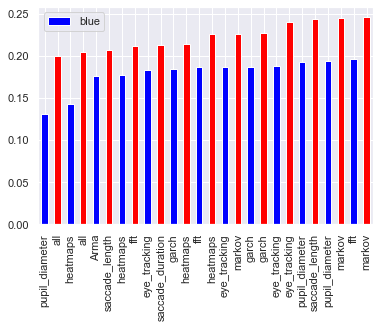

In [331]:
# TOP 13 RMSE with for one to one and 
smallest = df.nsmallest(13, "rmse")
smallest = smallest.reset_index()
smallest.index = 2*smallest.index +1
smallest_oto = one_to_one_df.nsmallest(13, "rmse")
smallest_oto = smallest_oto.reset_index()
smallest_oto.index = 2*smallest_oto.index
smallest = pd.concat([smallest, smallest_oto]).sort_index()


ax = smallest.loc[:,"rmse"].plot(kind="bar", color=['blue','red'], use_index=True)
ax.legend({"blue": "1t1", "red": "2to1"})
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["feature_combinations"], rotation=90)

In [161]:
df.loc[:, "in_study"].unique()

array(["['fractions', 'cscw']", "['emip', 'fractions']",
       "['emip', 'cscw']"], dtype=object)

## DIMENSIONALITY REDUCTION

### TWO TO ONE RMSE

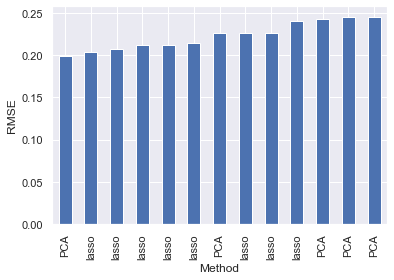

In [349]:
smallest = df.nsmallest(13, "rmse")

ax = smallest.loc[:,"rmse"].plot(kind="bar", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["dimensionality_reduction"], rotation=90)
ax.set_xlabel("Method")
ax.set_ylabel("RMSE")
ax.get_figure().savefig("plots/dimensionality_reduction_rmse_two_dataset.jpg")

### TWO TO ONE OOS RMSE

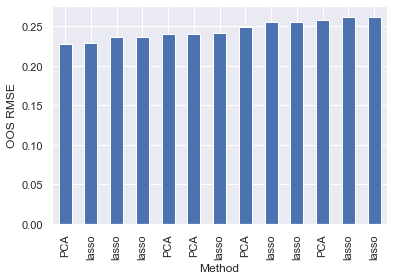

In [354]:
smallest = df.nsmallest(13, "oos_rmse")

ax = smallest.loc[:,"oos_rmse"].plot(kind="bar", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["dimensionality_reduction"], rotation=90)
ax.set_xlabel("Method")
ax.set_ylabel("OOS RMSE")
ax.get_figure().savefig("plots/dimensionality_reduction_oos_rmse_two_dataset.jpg")

### ONE TO ONE  RMSE

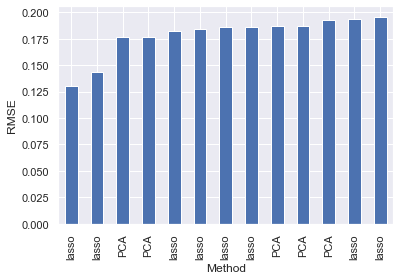

In [358]:
smallest = one_to_one_df.nsmallest(13, "rmse")

ax = smallest.loc[:,"rmse"].plot(kind="bar", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["dimensionality_reduction"], rotation=90)
ax.set_xlabel("Method")
ax.set_ylabel("RMSE")
ax.get_figure().savefig("plots/dimensionality_reduction_rmse_one_to_one.jpg")

## FEATURES

### TWO TO ONE RMSE

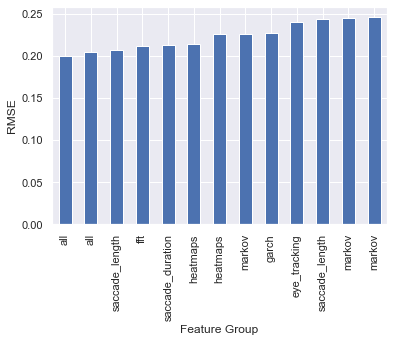

In [362]:
smallest = df.nsmallest(13, "rmse")

ax = smallest.loc[:,"rmse"].plot(kind="bar", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["feature_combinations"], rotation=90)
ax.set_xlabel("Feature Group")
ax.set_ylabel("RMSE")
ax.get_figure().savefig("plots/feature_groups_rmse_two_dataset.jpg")

### TWO TO ONE OOS RMSE

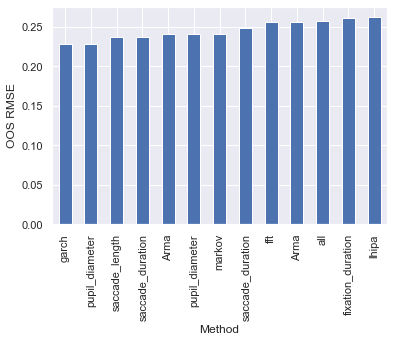

In [360]:
smallest = df.nsmallest(13, "oos_rmse")

ax = smallest.loc[:,"oos_rmse"].plot(kind="bar", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["feature_combinations"], rotation=90)
ax.set_xlabel("Method")
ax.set_ylabel("OOS RMSE")
ax.get_figure().savefig("plots/feature_groups_oos_rmse_two_dataset.jpg")

### ONE TO ONE  RMSE

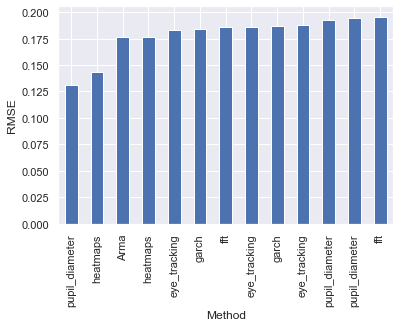

In [361]:
smallest = one_to_one_df.nsmallest(13, "rmse")
def plot
ax = smallest.loc[:,"rmse"].plot(kind="bar", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["feature_combinations"], rotation=90)
ax.set_xlabel("Method")
ax.set_ylabel("RMSE")
ax.get_figure().savefig("plots/feature_groups_rmse_one_to_one.jpg")

['fractions_cscw' 'emip_fractions' 'emip_cscw']


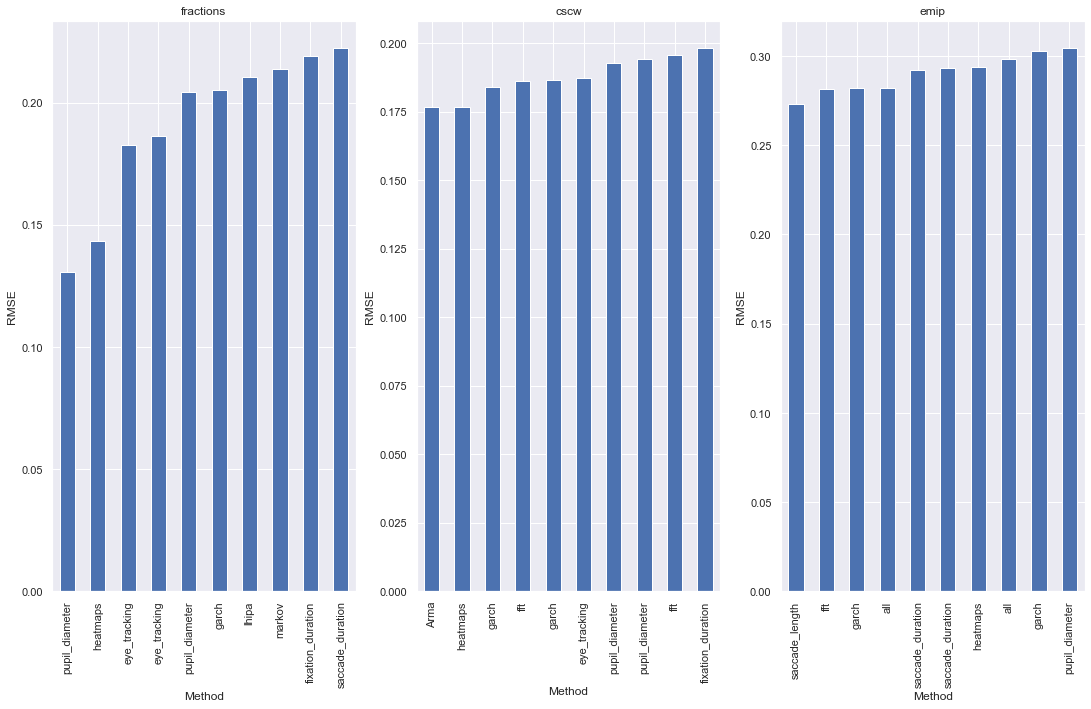

In [396]:
def plot_13_smallest_feature_generation(df, ax, dataset):
    ax = df.loc[:, "rmse"].plot(kind="bar", use_index=False, ax=ax)
    ax.set_xticks(range(len(smallest)))
    ax.set_xticklabels(smallest["feature_combinations"], rotation=90)
    ax.set_title(dataset)
    ax.set_xlabel("Method")
    ax.set_ylabel("RMSE")

print(df.loc[:, "in_study"].unique())
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(18.5, 10.5, forward=True)
for dataset, ax in zip(one_to_one_df.loc[:, "in_study"].unique(), axes):
    smallest = one_to_one_df[one_to_one_df["in_study"] == dataset].nsmallest(10, "rmse")
    plot_13_smallest_feature_generation(smallest, ax, dataset)

['fractions_cscw' 'emip_fractions' 'emip_cscw']


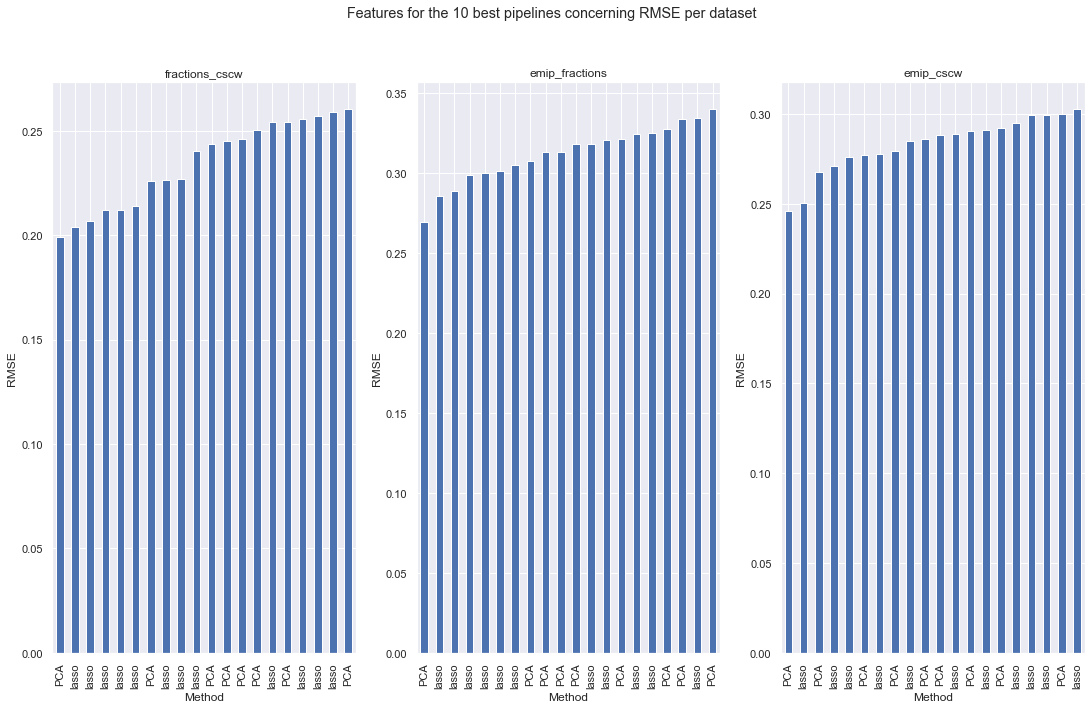

In [6]:
def plot_13_smallest_feature_generation(df, ax, dataset):
    ax = df.loc[:, "rmse"].plot(kind="bar", use_index=False, ax=ax)
    ax.set_xticks(range(len(smallest)))
    ax.set_xticklabels(smallest["dimensionality_reduction"], rotation=90)
    ax.set_title(dataset)
    ax.set_xlabel("Method")
    ax.set_ylabel("RMSE")

print(df.loc[:, "in_study"].unique())
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(18.5, 10.5, forward=True)
fig.suptitle("Features for the 10 best pipelines concerning RMSE per dataset")
for dataset, ax in zip(df.loc[:, "in_study"].unique(), axes):
    smallest = df[df["in_study"] == dataset].nsmallest(20, "rmse")
    plot_13_smallest_feature_generation(smallest, ax, dataset)

['fractions_cscw' 'emip_fractions' 'emip_cscw']


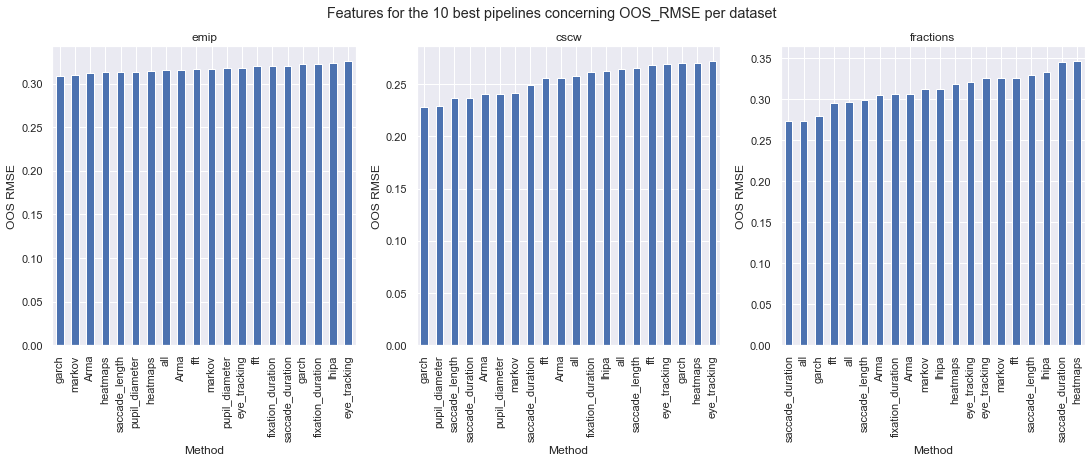

In [15]:
def plot_13_smallest_feature_generation(df, ax, dataset):
    ax = df.loc[:, "oos_rmse"].plot(kind="bar", use_index=False, ax=ax)
    ax.set_xticks(range(len(smallest)))
    ax.set_xticklabels(smallest["feature_combinations"], rotation=90)
    ax.set_title(dataset)
    ax.set_xlabel("Method")
    ax.set_ylabel("OOS RMSE")

print(df.loc[:, "in_study"].unique())
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(18.5, 5.5, forward=True)
fig.suptitle("Features for the 10 best pipelines concerning OOS_RMSE per dataset")
for dataset, ax in zip(df.loc[:, "out_of_study"].unique(), axes):
    smallest = df[df["out_of_study"] == dataset].nsmallest(20, "oos_rmse")
    plot_13_smallest_feature_generation(smallest, ax, dataset)

['fractions_cscw' 'emip_fractions' 'emip_cscw']


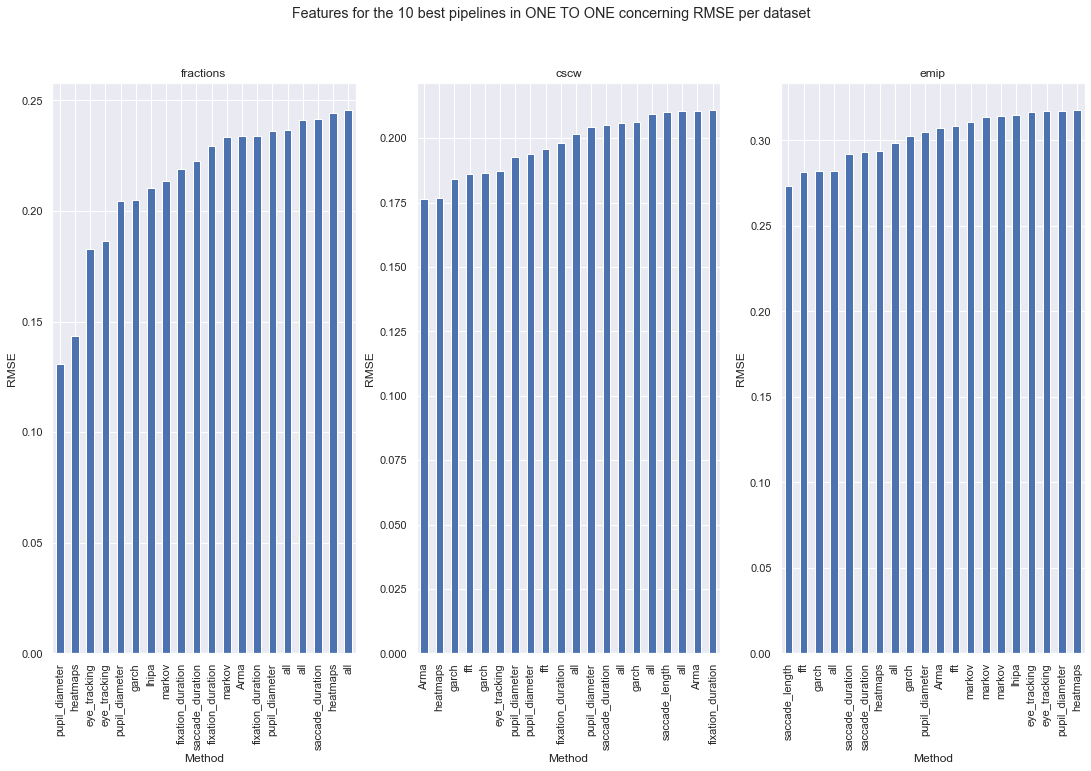

In [433]:
def plot_13_smallest_feature_generation(df, ax, dataset):
    ax = df.loc[:, "rmse"].plot(kind="bar", use_index=False, ax=ax)
    ax.set_xticks(range(len(smallest)))
    ax.set_xticklabels(smallest["feature_combinations"], rotation=90)
    ax.set_title(dataset)
    ax.set_xlabel("Method")
    ax.set_ylabel("RMSE")

print(df.loc[:, "in_study"].unique())
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(18.5, 10.5, forward=True)
fig.suptitle("Features for the 10 best pipelines in ONE TO ONE concerning RMSE per dataset")
for dataset, ax in zip(one_to_one_df.loc[:, "in_study"].unique(), axes):
    smallest = one_to_one_df[one_to_one_df["in_study"] == dataset].nsmallest(20, "rmse")
    plot_13_smallest_feature_generation(smallest, ax, dataset)

Text(0, 0.5, 'RMSE')

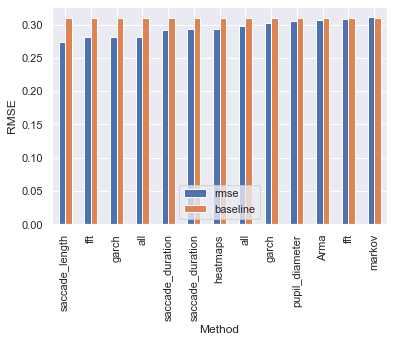

In [422]:
smallest = one_to_one_df[one_to_one_df["in_study"] == "emip"].nsmallest(13, "rmse")

ax = smallest.plot(kind="bar", y=["rmse", "baseline"], x="feature_combinations")
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["feature_combinations"], rotation=90)
ax.set_xlabel("Method")
ax.set_ylabel("RMSE")